<a href="https://colab.research.google.com/github/MaulanaJauhar/MachineLearning/blob/main/Week11/Meet11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modul 11 - Machine Learning
> Convolutional Neural Network (CNN)

##Nama : Jauhar Maulana A'la
##NIM : 2141720186
##Kelas : TI - 3A

###Praktikum 1
> Klasifikasi Kucing dan Anjing

####Langkah 1
> Import Library

In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Langkah 2
> Pra Pengolahan Data

#####Langkah 2.1
> Pra Pengolahan Data Training

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Machine_Learning/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


#####Langkah 2.2
> Pra Pengolahan Data Testing

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Machine_Learning/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 712 images belonging to 2 classes.


####Langkah 3
> Pembuatan Model CNN

#####Langkah 3.1
> Inisiasi Model CNN

In [8]:
cnn = tf.keras.models.Sequential()

#####Langkah 3.2
> Pembuatan Layer Konvolusi 1

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#####Langkah 3.3
> Pembuatan Layer Pooling 1

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#####Langkah 3.4
> Pembuatan Layer Konvolusi 2 dan Pooling 2

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#####Langkah 3.5
> Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

#####Langkah 3.6
> Fully Connected Layer 1 (Input)

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#####Langkah 3.7
> Fully Connected Layer 2 (Output)

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#####Langkah 3.8
> COmpile Model CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

####Langkah 4
> Fit CNN

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 2928s 12s/step - loss: 0.6599 - accuracy: 0.5943 - val_loss: 0.5478 - val_accuracy: 0.7374
Epoch 2/25
250/250 [==============================] - 35s 139ms/step - loss: 0.5915 - accuracy: 0.6849 - val_loss: 0.4751 - val_accuracy: 0.7640
Epoch 3/25
250/250 [==============================] - 33s 132ms/step - loss: 0.5476 - accuracy: 0.7210 - val_loss: 0.3143 - val_accuracy: 0.8694
Epoch 4/25
250/250 [==============================] - 33s 131ms/step - loss: 0.5227 - accuracy: 0.7372 - val_loss: 0.5958 - val_accuracy: 0.6742
Epoch 5/25
250/250 [==============================] - 33s 133ms/step - loss: 0.4925 - accuracy: 0.7600 - val_loss: 0.6451 - val_accuracy: 0.6503
Epoch 6/25
250/250 [==============================] - 33s 132ms/step - loss: 0.4737 - accuracy: 0.7692 - val_loss: 0.2342 - val_accuracy: 0.9031
Epoch 7/25
250/250 [==============================] - 33s 133ms/step - loss: 0.4707 - accuracy: 0.7785 - val_loss: 0.2380 - val_ac

####Langkah 5
> Prediksi dengan 1 Citra

In [17]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Machine_Learning/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 150ms/step


###Praktikum 2
> Klasifikasi Multi-label dengan Data CIFAR

####Langkah 1
> Load Library

In [18]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

####Langkah 2
> Unduh Dataset CIFAR

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


####Langkah 3
> Verifikasi Data

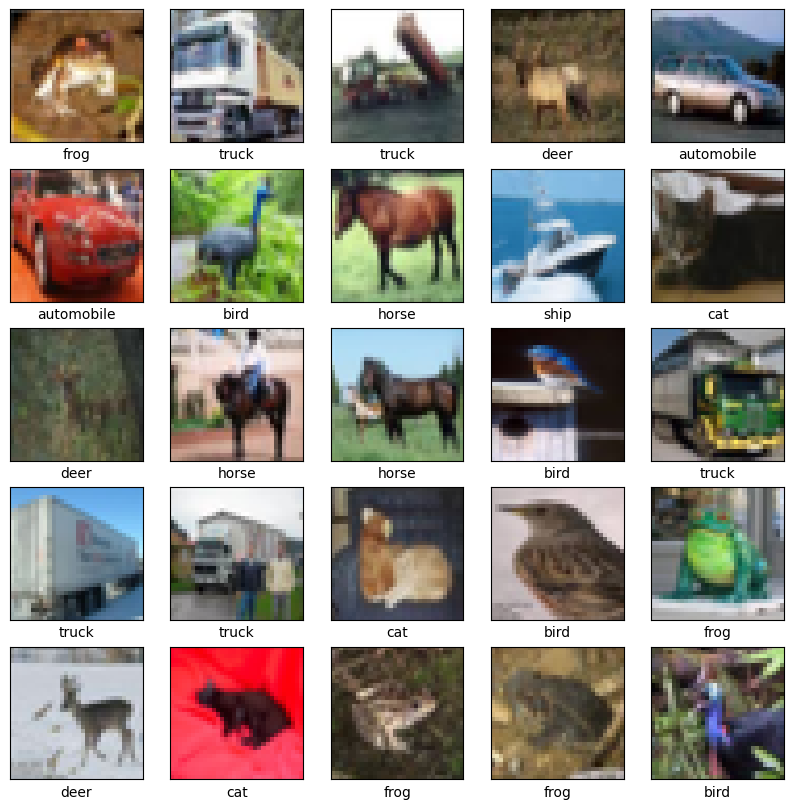

In [20]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

####Langkah 4
> Buat Model CNN

#####Langkah 4.1
> Buat Layer Konvolusi

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#####Langkah 4.2
> Cek Arsitektur Konvolusi

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

#####Langkah 4.3
> Tambahkan Layer Fully Connected

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#####Langkah 4.4
> Cek Arsitektur Model CNN

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

#####Langkah 4.5
> Compile Model CNN

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

####Langkah 5
> Fit Model

In [26]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5773 - accuracy: 0.4205 - val_loss: 1.2855 - val_accuracy: 0.5454
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1995 - accuracy: 0.5747 - val_loss: 1.1240 - val_accuracy: 0.6038
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0517 - accuracy: 0.6297 - val_loss: 1.0064 - val_accuracy: 0.6457
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9452 - accuracy: 0.6685 - val_loss: 0.9628 - val_accuracy: 0.6622
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8821 - accuracy: 0.6918 - val_loss: 0.9108 - val_accuracy: 0.6831
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8208 - accuracy: 0.7116 - val_loss: 0.8741 - val_accuracy: 0.6912
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7783 - accuracy: 0.7271 - val_loss: 0.8614 - val_accurac

####Langkah 6
> Evaluasi Model

313/313 - 1s - loss: 0.9061 - accuracy: 0.6959 - 852ms/epoch - 3ms/step


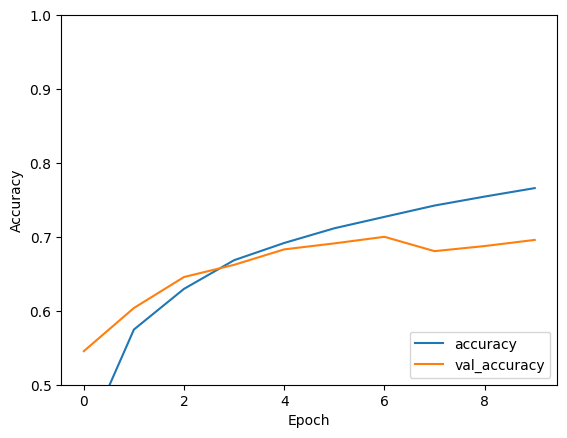

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

####Langkah 7
> Cetak Hasil Akurasi

In [28]:
print(test_acc)

0.695900022983551


###Tugas Praktikum



*   Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
*   Buatlah model CNN untuk klasifikasi dataset MNIST.



####Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

#####Import Library

In [29]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#####Load Dataset CIFAR

In [30]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#####Normalisasi nilai piksel menjadi antara 0 dan 1

In [31]:
train_images, test_images = train_images / 255.0, test_images / 255.0

#####Buat Model CNN

In [32]:
model = models.Sequential()

#####Tambahkan Konvolutional Layer

In [33]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#####Ratakan dan tambahkan Fully Connected Layer

In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(layers.Dense(10, activation='softmax'))

#####Compile modelnya

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#####Train model dengan lebih banyak epoch

In [36]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 12s 6ms/step - loss: 1.6087 - accuracy: 0.4073 - val_loss: 1.3900 - val_accuracy: 0.5045
Epoch 2/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2454 - accuracy: 0.5574 - val_loss: 1.0880 - val_accuracy: 0.6168
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0853 - accuracy: 0.6183 - val_loss: 0.9847 - val_accuracy: 0.6577
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9843 - accuracy: 0.6577 - val_loss: 0.9202 - val_accuracy: 0.6785
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9058 - accuracy: 0.6855 - val_loss: 0.9690 - val_accuracy: 0.6632
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8454 - accuracy: 0.7058 - val_loss: 0.8940 - val_accuracy: 0.6965
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7925 - accuracy: 0.7256 - val_loss: 0.9041 - val_accuracy

#####Evaluasi hasil model

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.9373 - accuracy: 0.7314 - 720ms/epoch - 2ms/step
Test accuracy: 0.7314000129699707


#####Plot Training History

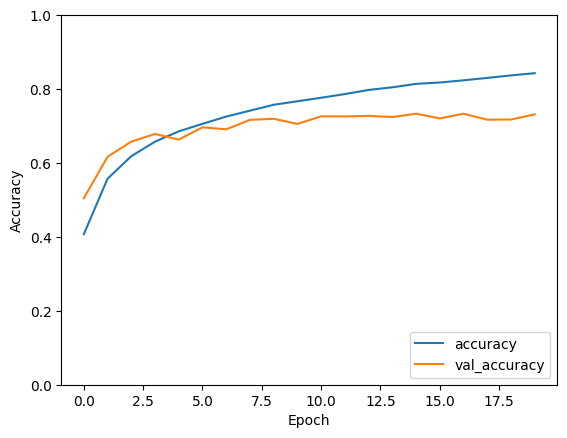

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


####Buatlah model CNN untuk klasifikasi dataset MNIST.

#####Import Library

In [39]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#####Load Dataset MNIST

In [40]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


#####Normalisasi nilai piksel menjadi antara 0 dan 1

In [41]:
train_images, test_images = train_images / 255.0, test_images / 255.0

#####Buat Model CNN

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#####Compile modelnya

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#####Latih model dengan lebih banyak epoch

In [44]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1488 - accuracy: 0.9530 - val_loss: 0.0476 - val_accuracy: 0.9863
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0404 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0294 - val_accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0266 - val_accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0346 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0324 - val_accura

#####Evaluasi hasil model

In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0339 - accuracy: 0.9908 - 672ms/epoch - 2ms/step
Test accuracy: 0.9908000230789185


#####Plot training history

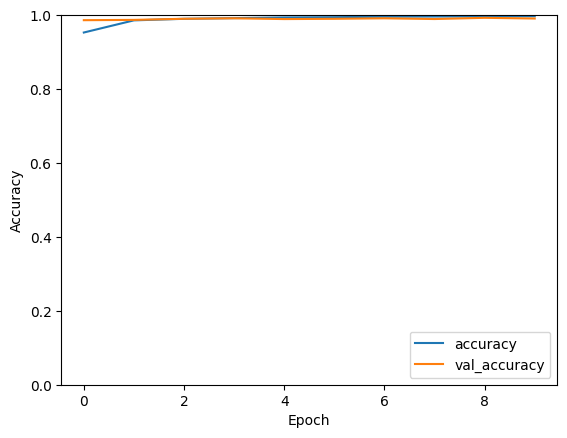

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
